In [1]:
!pip install pyvi

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import regex as re
from string import digits
from collections import Counter
from pyvi import ViTokenizer
import nltk
from gensim.models.word2vec import Word2Vec
from keras.utils import to_categorical
%matplotlib inline

In [6]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [38]:
# Hàm tách từ
def custom_tokenizer(content):
  content = ViTokenizer.tokenize(content.lower())
  return content.split()

# Thực hiện xóa các từ stopwords
STOPWORDS = 'stopwords_vietnamese.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)

#Đổi khoảng trắng thành _ để nhận diện xóa stopword khi tách từ
sto1 = []
for item in stopwords:
  t = str(item)
  #t.replace(" ", "_")
  result = '_'.join(t.split())
  sto1.append(result)
sto1 = set(sto1)

def remove_words(words_list, words_to_remove):
    # Chuyển danh sách từ cần xóa thành tập hợp để tăng hiệu suất
    words_to_remove_set = set(words_to_remove)

    # Lọc các từ trong danh sách từ cần xóa ra khỏi danh sách từ
    result = [word for word in words_list if word not in words_to_remove_set]

    return result

import regex as re

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"


def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()

# Hàm chuẩn hóa unicode
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [30]:
# Load dữ liệu từ file CSV
def load_data(csv_file):
    return pd.read_csv(csv_file, sep='\t')

# Đường dẫn đến file CSV của bộ dữ liệu VLSP
file_path = "vlsp_sentiment_train.csv"

# Sử dụng hàm load_data để đọc dữ liệu từ file CSV
train_data = load_data(file_path)

In [31]:
# Đường dẫn đến file CSV của bộ dữ liệu VLSP
file_path = "vlsp_sentiment_test.csv"

# Sử dụng hàm load_data để đọc dữ liệu từ file CSV
test_data = load_data(file_path)

In [53]:
# LABEL CHO TẬP DATASET TRAIN VÀ TEST

label_map = ['Neg', 'Neu', 'Pos']
import csv
with open("vlsp_sentiment_train.csv") as f:
    reader = csv.reader(f)
    l = [row for row in reader]

Neg = []
Neu = []
Pos = []

for i in range(1,len(l)):
  if l[i][0] == '-1':
    Neg.append(1)
    Neu.append(0)
    Pos.append(0)
  elif l[i][0] == '0':
    Neg.append(0)
    Neu.append(1)
    Pos.append(0)
  else:
    Neg.append(0)
    Neu.append(0)
    Pos.append(1)

train_data = train_data.iloc[:len(Neg)].copy()
train_data['Neg'] = Neg
train_data['Neu'] = Neu
train_data['Pos'] = Pos


train_data.head()
#print(len(train_df))

,Data,Data_words,Class,Neg,Neu,Pos
0,anywhere thế_hệ đầu thất_vọng vứt xó giá đắt n...,"[anywhere, thế_hệ, đầu, thất_vọng, vứt, xó, gi...",-1,0,0,1
1,độ trễ trễ bực_mình đấy văn_phòng game ném đi ...,"[độ, trễ, trễ, bực_mình, đấy, văn_phòng, game,...",-1,0,0,1
2,dag xài cùi bắp 98kpin trâu tội đánh liên_minh...,"[dag, xài, cùi, bắp, 98kpin, trâu, tội, đánh, ...",-1,0,0,1
3,logitech hàng tiền triệu trở 400k bữa hư eblue...,"[logitech, hàng, tiền, triệu, trở, 400k, bữa, ...",-1,0,0,1
4,xài m175 cùi mía xài chuột thử kia kết_quả 3 4...,"[xài, m175, cùi, mía, xài, chuột, thử, kia, kế...",-1,0,0,1


In [81]:
# LABEL CHO TẬP DATASET TRAIN VÀ TEST

label_map = ['Neg', 'Neu', 'Pos']
import csv
with open("vlsp_sentiment_train.csv") as f:
    reader = csv.reader(f)
    l = [row for row in reader]

Neg = []
Neu = []
Pos = []

for i in range(1,len(l)):
  value = l[i][0].split("\t")[0]
  if value == '-1':
    Neg.append(1)
    Neu.append(0)
    Pos.append(0)
  elif value == '0':
    Neg.append(0)
    Neu.append(1)
    Pos.append(0)
  else:
    Neg.append(0)
    Neu.append(0)
    Pos.append(1)

train_data['Neg'] = Neg
train_data['Neu'] = Neu
train_data['Pos'] = Pos

train_data.head()
#print(len(train_df))


label_map = ['Neg', 'Neu', 'Pos']
import csv
with open("vlsp_sentiment_test.csv") as f:
    reader = csv.reader(f)
    l = [row for row in reader]

Neg = []
Neu = []
Pos = []
for i in range(1,len(l)):
  value = l[i][0].split("\t")[0]
  if value == '-1':
    Neg.append(1)
    Neu.append(0)
    Pos.append(0)
  elif value == '0':
    Neg.append(0)
    Neu.append(1)
    Pos.append(0)
  else:
    Neg.append(0)
    Neu.append(0)
    Pos.append(1)

test_data['Neg'] = Neg
test_data['Neu'] = Neu
test_data['Pos'] = Pos

test_data.head()
#print(len(train_df))

,Data,Data_words,Class,Neg,Neu,Pos
0,thiệt chuột tuốt trừ 1 hãng razer sởhữu 1 da b...,"[thiệt, chuột, tuốt, trừ, 1, hãng, razer, sởhữ...",-1,1,0,0
1,mx1 ngon 3 tháo thay 3 nút bấm may lột máy,"[mx1, ngon, 3, tháo, thay, 3, nút, bấm, may, l...",-1,1,0,0
2,đc thuyếtphục mua vụ pin,"[đc, thuyếtphục, mua, vụ, pin]",-1,1,0,0
3,báo tracứu bảnđồ dịchvụ ip lành mànhình bé tí ...,"[báo, tracứu, bảnđồ, dịchvụ, ip, lành, mànhình...",-1,1,0,0
4,mua việt nam ứngdụng mấy notification,"[mua, việt, nam, ứngdụng, mấy, notification]",-1,1,0,0


In [82]:
#TÁCH TỪ XÓA STOPWORDS TẬP TRAIN
a = []
for i in range(0,len(train_data)):
  example = str(train_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  example = example.lower()
  t = covert_unicode(example)
  # chuyen thanh tu viet thuong
  t = " ".join(t.split()) #Xoa khoang trang du thua
  #tách từ cho text
  tempt = custom_tokenizer(t)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  a.append(((tempt)))
train_data['Data_words'] = a

#TÁCH TỪ XÓA STOPWORDS TẬP TEST
b = []
for i in range(0,len(test_data)):
  example = str(test_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  example = example.lower()
  t = covert_unicode(example)
  # chuyen thanh tu viet thuong
  t = " ".join(t.split()) #Xoa khoang trang du thua
  #tách từ cho text
  tempt = custom_tokenizer(t)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  b.append(((tempt)))
test_data['Data_words'] = b

In [83]:
#TÁCH TỪ XÓA STOPWORDS TẬP TRAIN CHO CỘT DATA
c = []
for i in range(0,len(train_data)):
  example = str(train_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  #tách từ cho text
  tempt = custom_tokenizer(example)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  sentence = " ".join(tempt)
  c.append(((sentence)))
train_data['Data'] = c

#TÁCH TỪ XÓA STOPWORDS TẬP TEST CHO CỘT DATA
d = []
for i in range(0,len(test_data)):
  example = str(test_data['Data'][i])
  punc = '''!()-[]{}:;'"“”\,<>./?@#$%^&*_~★■・•▌✓●✅►✦✔♦'''
  for ele in example:
          i = 0
          if ele in punc:
              example = example.strip().replace(ele, "")
  #tách từ cho text
  tempt = custom_tokenizer(example)
  #thực hiện xóa stopwords
  tempt = remove_words(tempt, sto1)
  sentence = " ".join(tempt)
  d.append(((sentence)))
test_data['Data'] = d

In [75]:
test_data

,Data,Data_words,Class,Neg,Neu,Pos
0,thiệt chuột tuốt trừ 1 hãng razer sởhữu 1 da b...,"[thiệt, chuột, tuốt, trừ, 1, hãng, razer, sởhữ...",-1,1,0,0
1,mx1 ngon 3 tháo thay 3 nút bấm may lột máy,"[mx1, ngon, 3, tháo, thay, 3, nút, bấm, may, l...",-1,1,0,0
2,đc thuyếtphục mua vụ pin,"[đc, thuyếtphục, mua, vụ, pin]",-1,1,0,0
3,báo tracứu bảnđồ dịchvụ ip lành mànhình bé tí ...,"[báo, tracứu, bảnđồ, dịchvụ, ip, lành, mànhình...",-1,1,0,0
4,mua việt nam ứngdụng mấy notification,"[mua, việt, nam, ứngdụng, mấy, notification]",-1,1,0,0
...,...,...,...,...,...,...
1045,30 củ,"[30, củ]",0,1,0,0
1046,apple dc thi samsung nhiêu khac chêt samsung b...,"[apple, dc, thi, samsung, nhiêu, khac, chêt, s...",0,1,0,0
1047,giúp android vượttrội ios cứu hệ sinhthái andr...,"[giúp, android, vượttrội, ios, cứu, hệ, sinhth...",0,1,0,0
1048,mẹ đàiloan mua 1 iphone6 plus i đổi máy chờ quen,"[mẹ, đàiloan, mua, 1, iphone6, plus, i, đổi, m...",0,1,0,0


In [84]:
train_data = train_data[['Data', 'Data_words', 'Class', 'Neg', 'Neu', 'Pos']]

In [85]:
test_data = test_data[['Data', 'Data_words', 'Class', 'Neg', 'Neu', 'Pos']]

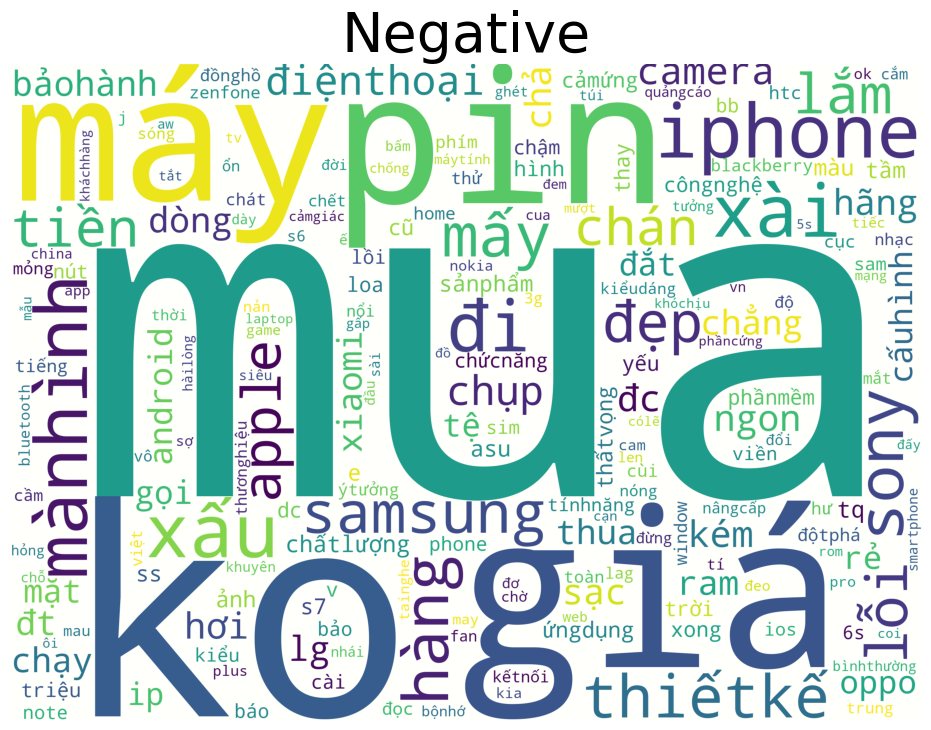

In [86]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pylab as plt
from PIL import Image
import numpy as np

plt.figure(figsize=(40,25))

# Not
subset = train_data[train_data.Neg==1]
text = subset.Data.values
cloud_Not = WordCloud(
                          background_color='#fffffc',
                          #color = '#ffadad',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Negative",fontsize=40)
plt.imshow(cloud_Not)


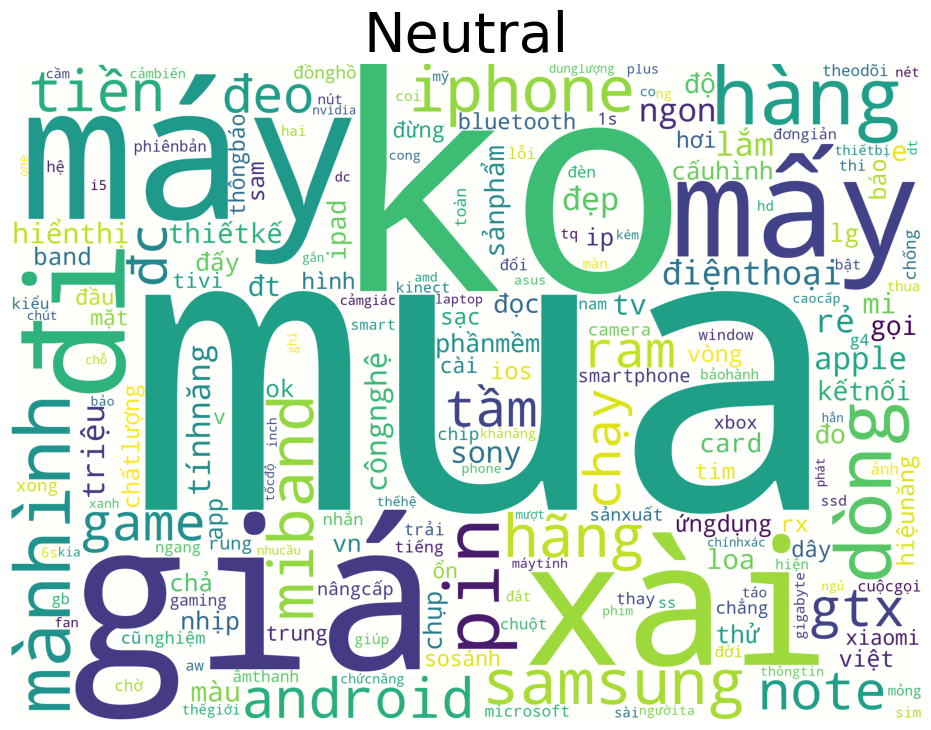

In [87]:
# Source
plt.figure(figsize=(40,25))

subset = train_data[train_data.Neu==1]
text = subset.Data.values
cloud_Source = WordCloud(
                          background_color='#fffffc',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Neutral",fontsize=40)
plt.imshow(cloud_Source)

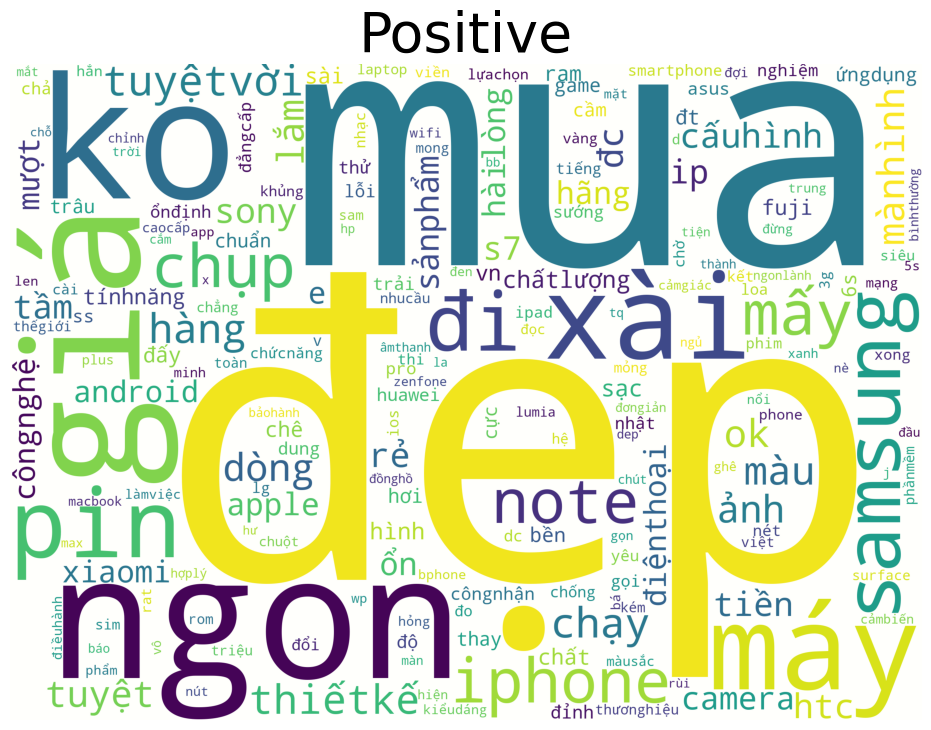

In [88]:
# Sink
plt.figure(figsize=(40,25))

subset = train_data[train_data.Pos==1]
text = subset.Data.values
cloud_Sink = WordCloud(
                          background_color='#fffffc',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Positive",fontsize=40)
plt.imshow(cloud_Sink)

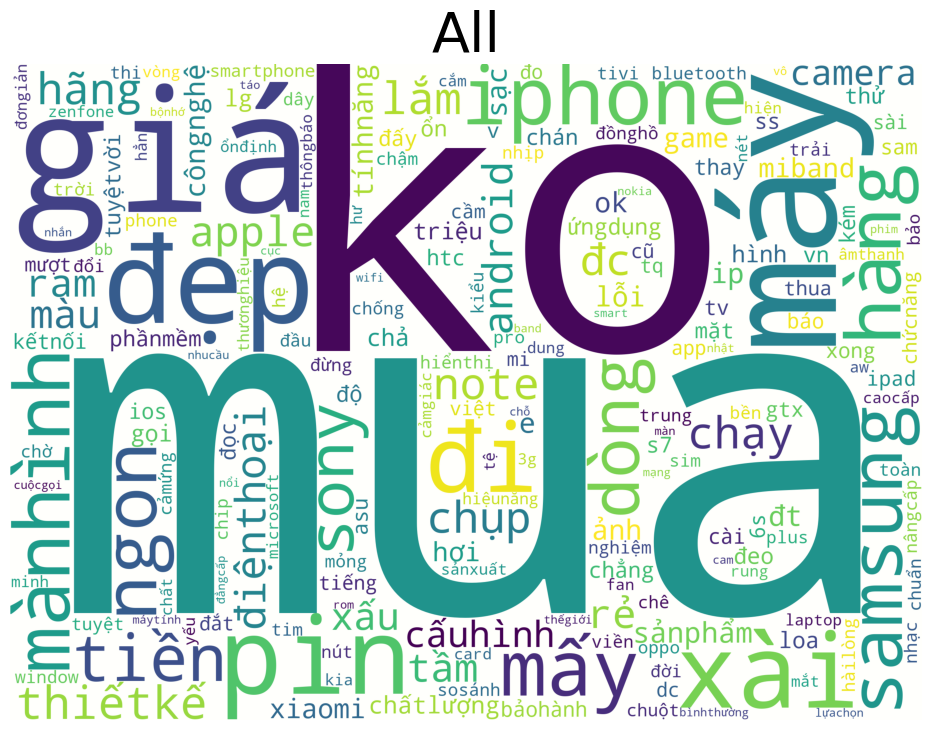

In [89]:
# All
plt.figure(figsize=(40,25))

#subset = train_df[train_df.Sink==1]
text = train_data['Data'].values
cloud_All = WordCloud(
                          background_color='#fffffc',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("All",fontsize=40)
plt.imshow(cloud_All)

ĐẾM SỐ LƯỢNG TỪ TRONG TẬP DỮ LIỆU TỔNG

In [90]:
text

array(['anywhere thếhệ đầu thấtvọng vứt xó giá đắt ngốn pin ăngỏi',
       'độ trễ trễ bựcmình đấy vănphòng game ném đi độ trễ kết chuột sứ mitsumi gọn bấm nảy',
       'dag xài cùi bắp 98kpin trâu tội đánh liênminh ứcchế đập 2', ...,
       'màu vàng zenfone 3 ad', 'mua 1kái k pokemon dc đem đi đổi 20 hjc',
       'trang asuscomvn địachỉ trungtâm bảohành điệnthoạivậy mua sạc cáp cục pin sạc dựphòng zenpower hãng mua'],
      dtype=object)

In [91]:
All_words = []
for i in range(0,len(text)):
  tempt = text[i].split()
  for j in range(0,len(tempt)):
    All_words.append(tempt[j])

In [100]:
#So luong từ khi chưa xóa trùng
print('Số lượng từ khi chưa xóa trùng',len(All_words))
#Số lượng từ khi xóa trùng
unique_l=list(set(All_words))
print('Số lượng từ khi đã xóa trùng',len(unique_l))

Số lượng từ khi chưa xóa trùng 63795
Số lượng từ khi đã xóa trùng 9621


In [93]:
import collections

In [94]:
count_words_All_words = collections.Counter(All_words)

In [95]:
count_words_All_words

Counter({'mua': 1085,
         'ko': 836,
         '1': 721,
         'giá': 660,
         'máy': 572,
         'đẹp': 570,
         '2': 542,
         'pin': 515,
         'xài': 481,
         'đi': 414,
         'iphone': 399,
         'mấy': 370,
         'mànhình': 366,
         'hàng': 354,
         'samsung': 340,
         'ngon': 339,
         'dòng': 278,
         'tiền': 252,
         'sony': 249,
         'thiếtkế': 247,
         'lắm': 240,
         '3': 238,
         'chạy': 233,
         'note': 232,
         'chụp': 228,
         'hãng': 227,
         'đc': 225,
         'điệnthoại': 211,
         'apple': 210,
         'android': 203,
         'rẻ': 194,
         'tầm': 192,
         'màu': 187,
         'ram': 180,
         'xấu': 178,
         'k': 171,
         '5': 164,
         'cấuhình': 161,
         '=': 160,
         'camera': 156,
         'sảnphẩm': 155,
         'đt': 155,
         'e': 153,
         'lỗi': 151,
         'côngnghệ': 150,
         'ảnh': 150,


In [96]:
print(count_words_All_words.most_common())

[('mua', 1085), ('ko', 836), ('1', 721), ('giá', 660), ('máy', 572), ('đẹp', 570), ('2', 542), ('pin', 515), ('xài', 481), ('đi', 414), ('iphone', 399), ('mấy', 370), ('mànhình', 366), ('hàng', 354), ('samsung', 340), ('ngon', 339), ('dòng', 278), ('tiền', 252), ('sony', 249), ('thiếtkế', 247), ('lắm', 240), ('3', 238), ('chạy', 233), ('note', 232), ('chụp', 228), ('hãng', 227), ('đc', 225), ('điệnthoại', 211), ('apple', 210), ('android', 203), ('rẻ', 194), ('tầm', 192), ('màu', 187), ('ram', 180), ('xấu', 178), ('k', 171), ('5', 164), ('cấuhình', 161), ('=', 160), ('camera', 156), ('sảnphẩm', 155), ('đt', 155), ('e', 153), ('lỗi', 151), ('côngnghệ', 150), ('ảnh', 150), ('sạc', 149), ('4', 148), ('ok', 148), ('tínhnăng', 148), ('ip', 145), ('xiaomi', 143), ('6', 141), ('miband', 139), ('hơi', 138), ('game', 137), ('chấtlượng', 137), ('chả', 134), ('triệu', 131), ('gọi', 130), ('lg', 128), ('7', 128), ('hình', 127), ('10', 124), ('+', 120), ('ứngdụng', 119), ('loa', 119), ('đeo', 118), 

In [97]:
len(count_words_All_words)

9621

In [98]:
train_data['word_count'] = train_data['Data_words'].apply(lambda x: len(str(x).split()))
train_data['review_len'] = train_data['Data'].astype(str).apply(len)

In [99]:
train_data.head()

,Data,Data_words,Class,Neg,Neu,Pos,word_count,review_len
0,anywhere thếhệ đầu thấtvọng vứt xó giá đắt ngố...,"[anywhere, thếhệ, đầu, thấtvọng, vứt, xó, giá,...",-1,1,0,0,11,57
1,độ trễ trễ bựcmình đấy vănphòng game ném đi độ...,"[độ, trễ, trễ, bựcmình, đấy, vănphòng, game, n...",-1,1,0,0,18,83
2,dag xài cùi bắp 98kpin trâu tội đánh liênminh ...,"[dag, xài, cùi, bắp, 98kpin, trâu, tội, đánh, ...",-1,1,0,0,12,57
3,logitech hàng tiền triệu trở 400k bữa hư eblue...,"[logitech, hàng, tiền, triệu, trở, 400k, bữa, ...",-1,1,0,0,10,51
4,xài m175 cùi mía xài chuột thử kia kếtquả 3 4 ...,"[xài, m175, cùi, mía, xài, chuột, thử, kia, kế...",-1,1,0,0,36,160


In [101]:
average_review_len = train_data['review_len'].mean()
print("Trung bình độ dài review:", average_review_len)

Trung bình độ dài review: 64.88180924287119
